<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_4_Wines_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ερώτημα 1

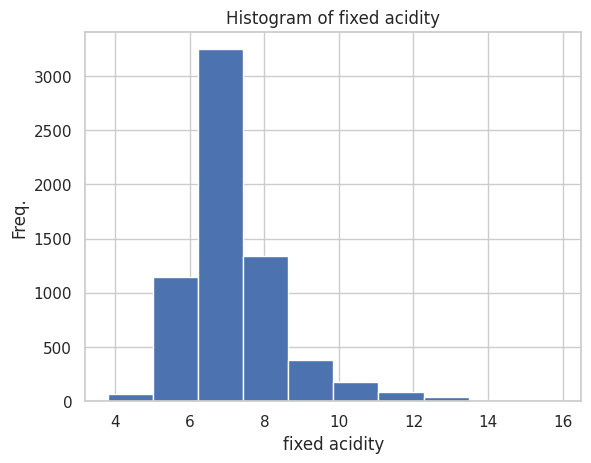

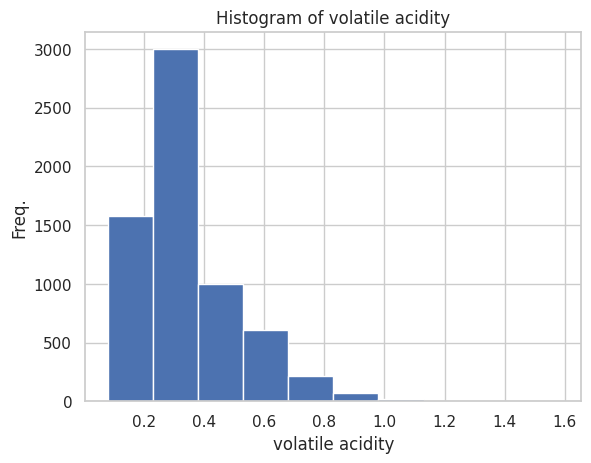

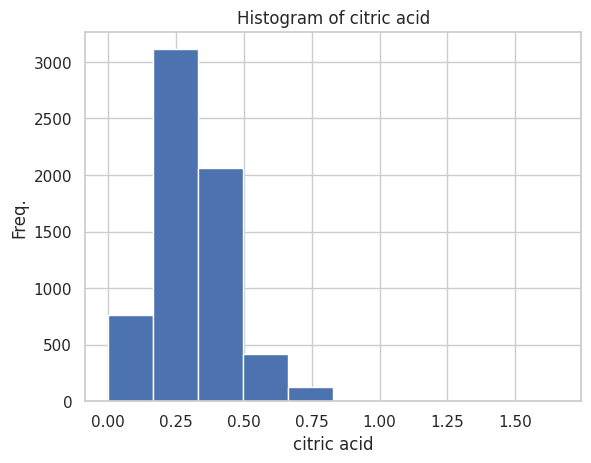

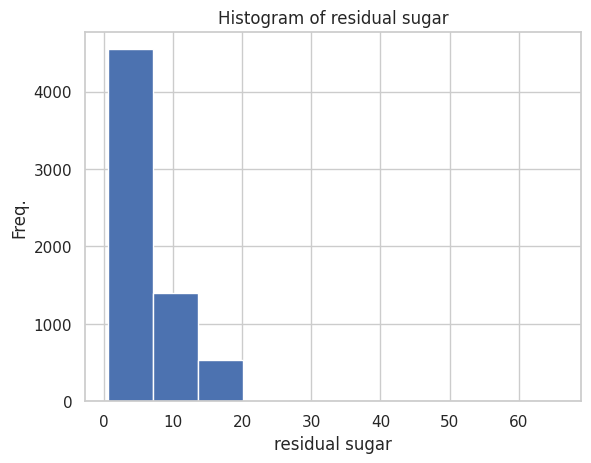

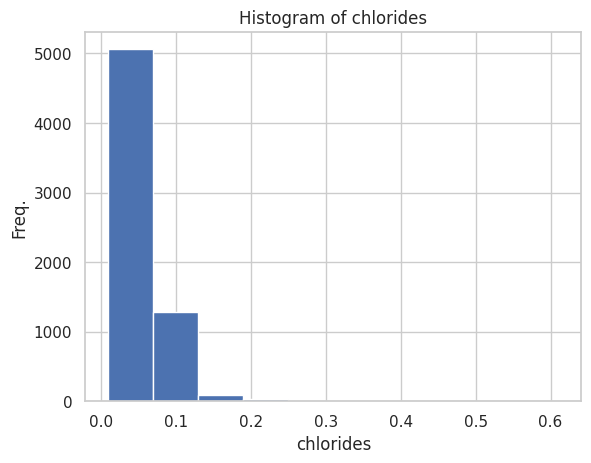

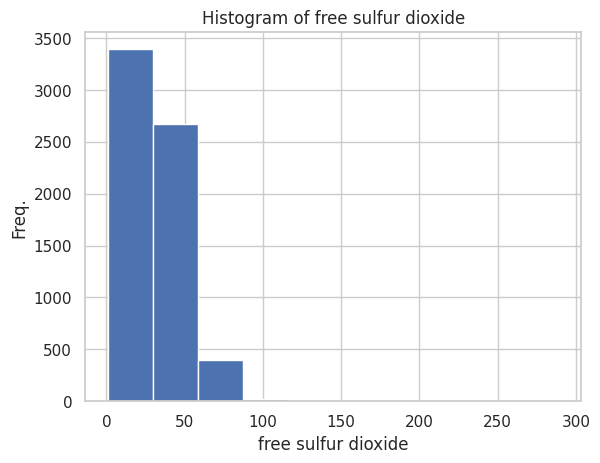

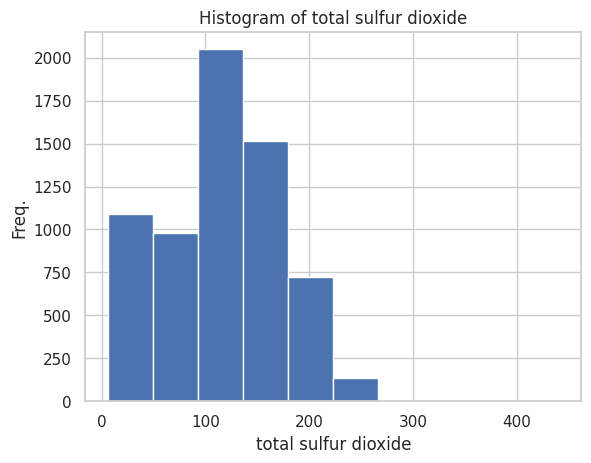

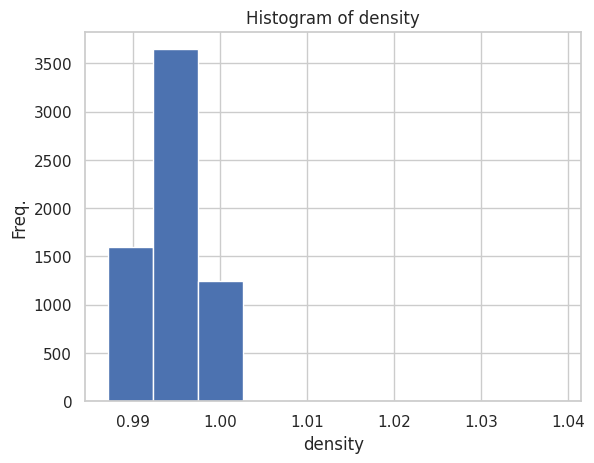

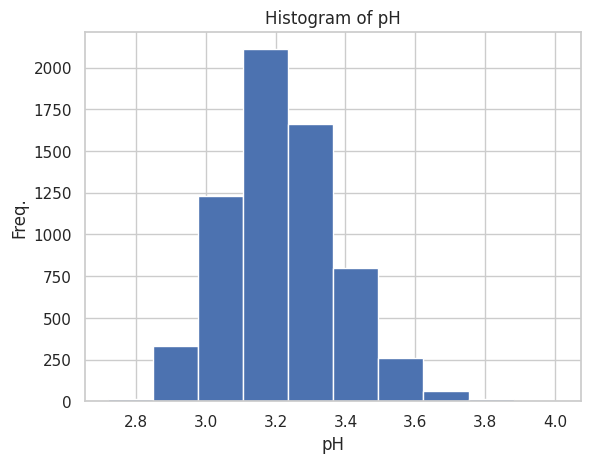

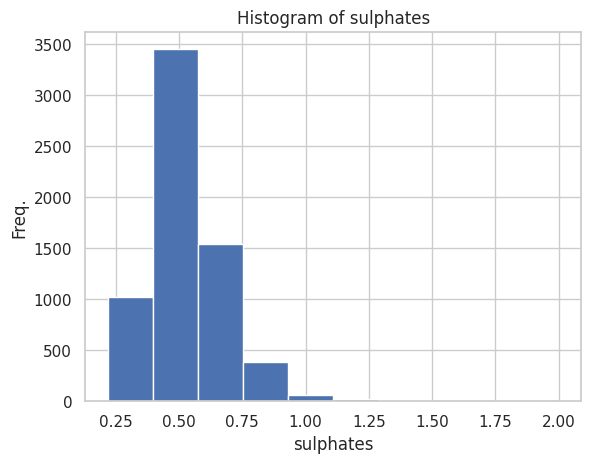

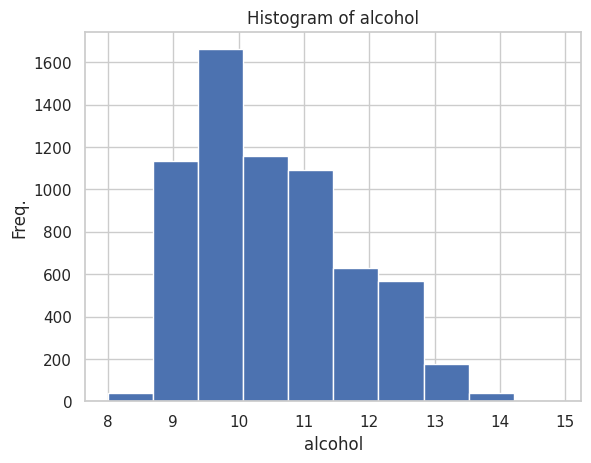

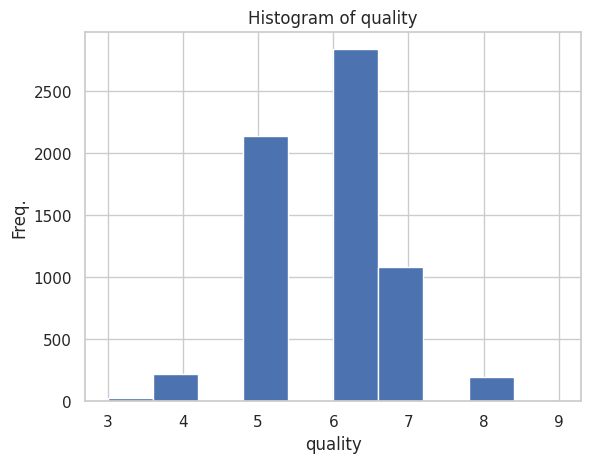

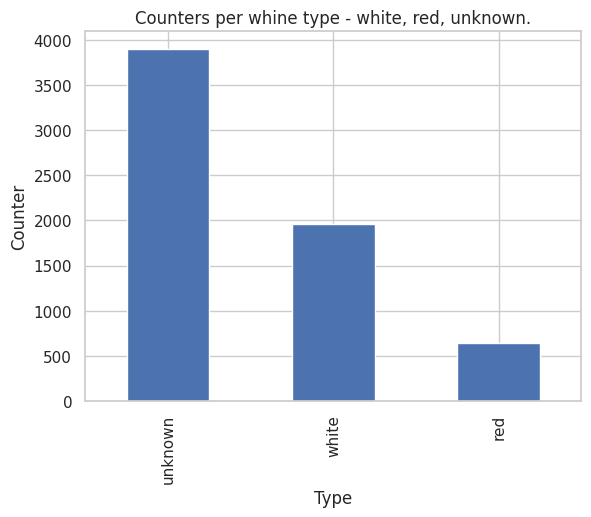

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/wine-missing.csv")

histogram_attributes = df.select_dtypes(include='number').columns

for attribute in histogram_attributes:
    plt.figure()
    df[attribute].hist()
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Freq.')
    plt.show()

plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title('Counters per whine type - white, red, unknown.')
plt.xlabel('Type')
plt.ylabel('Counter')
plt.show()

Έχουμε αρκετές τιμές που λείπουν σε αρκετά attrs, και τα περισσότερα κρασιά ανοίκουν στην κατηγορία unknown (αρκετά κακό, και ευχαριστούμε που μας κάνετε τη ζωή δύσκολη 😅).

Τα περισσότερα attrs δεν έχουν ομοιόμορφη κατανομή. Επίσης, η πλοιοψηφία των βαθμολογιών για ένα κρασί βρίσκονται ή στο 5, ή μεταξύ 6 και 7. Το περίεργο είναι πως δεν υπάρχει βαθμολογία που να είναι 6 παρά. Επομένως τα κρασιά είτε θα είναι αρκετά καλά, είτε αρκετά κακά.

Τέλος, κάπως το ιστόγραμμα του pH φαίνεται να είναι πιο κοντά σε μία γραφική "καμπάνα", που σημαίνει πως οι τιμές είναι κοντά στο mean με μια ελαφριά κλίση προς τα αριστερά. Τα υπόλοιπα attrs έχουν αριστερόστροφη ασύμετρη κατανομή.

# Ερώτημα 2

In [95]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df['type'] = df['type'].map(mapping)

y = df["type"].to_numpy()
x = df.drop(columns=["type"]).to_numpy()

x.shape, y.shape


((6497, 12), (6497,))

# Ερώτημα 3

In [96]:
set_unknown = (y == 2)
set_known = ~set_unknown

x_known = x[set_known]
y_known = y[set_known]
x_unknown = x[set_unknown]

x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

# Ερώτημα 4

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.30, random_state=42, stratify=y_known
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

print("Total nans in x_train:", np.isnan(x_train).sum())
print("Total nans in x_test :", np.isnan(x_test).sum())
print("Total nans in y_train:", np.isnan(y_train).sum())
print("Total nans in y_test :", np.isnan(y_test).sum())

Total nans in x_train: 9
Total nans in x_test : 1
Total nans in y_train: 0
Total nans in y_test : 0


# Ερώτημα 5

In [98]:
import json
random_f = RandomForestClassifier(
    random_state=42
)
random_f.fit(x_train, y_train)

y_pred_train = random_f.predict(x_train)
y_pred_test = random_f.predict(x_test)

results = {
    "train_result": {
        "accuracy": accuracy_score(y_train, y_pred_train),
        "precision": precision_score(y_train, y_pred_train),
        "recall": recall_score(y_train, y_pred_train),
        "f1": f1_score(y_train, y_pred_train),
    },
    "test_result": {
        "accuracy": accuracy_score(y_test, y_pred_test),
        "precision": precision_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test),
    }
}

print(json.dumps(results, indent=4))


{
    "train_result": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test_result": {
        "accuracy": 0.9987179487179487,
        "precision": 0.9948186528497409,
        "recall": 1.0,
        "f1": 0.9974025974025974
    }
}


Το F1 ειναι καλυτερο, γιατι πρακτικα χρησ/ει το precision και το recall για να εχει πιο accurate αποτελεσμα απο το accuracy. Στη συγκεκριμενη ομως περιπτωση, o classifier μας (RF) λειτουργησε ιδανικα θα ελεγε κανεις. Επομενως το accuracy και το F1 φαινεται να ειναι παρεμφερη, οριακα ιδια. Σε διαφορετικη περιπτωση, ο F1 θα ηταν καλυτερη λυση γιατι σε δεδομενα τα οποια εχουν μεγαλη διαφορα ισορροπιας, λειτουργει καλυτερα διοτι οπως ειπα και παραπανω λαμβανει υποψην το recall και το precision βαγζοντας καλυτερο αποτελεσμα. το Accuracy αν το δειγμα μας εχει ανισορροπια της ταξης 80-20, θα εδινε 80% πιθανοτητα να βαθμολογησει μια unknown τιμη, το οποιο ειναι και λαθος. Επειδη το precision ειναι 99,7% - διοτι το RF εκανε πολυ καλη δουλεια - και επειδη μπορει να καταλαβει ποιο ειναι το κοκκινο κρασι με αριστο τροπο, σημαινει οτι και το accuracy θα εχει την ιδια αξια σε αυτο το παραδειγμα δεδομενων και υπο αυτες τις συνθηκες.


---


**Συμπερασμα**: το F1 σε ΜΗ ισορροπημενα δεδομενα θα λειτουργει παντα καλυτερα (επομενως στο δικο μας εκ των προτερων ειναι καλυτερο λογω του 75-25 μεταξυ λευκων και ερυθρων). Στο συγκεκριμενο ομως παραδειγμα, λογω του αριστου precision που βρηκε ο RF, δεν εχει απολυτως καμια σημασια καθως το accuracy ειναι σχεδον ιδιο με το F1.

# Ερώτημα 6

In [99]:
random_f_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)
random_f_balanced.fit(x_train, y_train)

y_pred_train_balanced = random_f_balanced.predict(x_train)
y_pred_test_balanced = random_f_balanced.predict(x_test)

results_balanced = {
    "train_result_balanced": {
        "accuracy": accuracy_score(y_train, y_pred_train_balanced),
        "precision": precision_score(y_train, y_pred_train_balanced),
        "recall": recall_score(y_train, y_pred_train_balanced),
        "f1": f1_score(y_train, y_pred_train_balanced),
    },
    "test_result_balanced": {
        "accuracy": accuracy_score(y_test, y_pred_test_balanced),
        "precision": precision_score(y_test, y_pred_test_balanced),
        "recall": recall_score(y_test, y_pred_test_balanced),
        "f1": f1_score(y_test, y_pred_test_balanced),
    }
}

print(json.dumps(results_balanced, indent=4))

{
    "train_result_balanced": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test_result_balanced": {
        "accuracy": 0.9948717948717949,
        "precision": 0.9947368421052631,
        "recall": 0.984375,
        "f1": 0.9895287958115183
    }
}


Εξήγηση μεταβλητης balanced: συμφωνα με τη scikit βιβλιοθηκη, η μεταβλητη αυτη κανει την RF μεθοδολογια να λαβει υποψην την οχι τοσο equaly represented κλαση παραπανω ωστε να ισορροπισει οσο γινεται το δειγμα, για να βγαλει πιο ρεαλιστικο αποτελεσμα η ιδια η μεθοδολογια. Ετσι μειωνεται το bias του αποτελεσματος οταν υπαρχουν μη ισορροπημενο dataset (πρακτικα κανει τα βαρη των μη represented κλασεων πιο υψηλα).


1.   **Source**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2.   **Source ref**: The “balanced” mode uses the values of y to automatically adjust weights **inversely proportional** to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`


# Ερώτημα 7

In [100]:
y_unknown_proba = random_f_balanced.predict_proba(x_unknown)

y_unknown_proba[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Ερώτημα 8

In [101]:
classes = random_f_balanced.classes_
white_index = int(np.where(classes == 0)[0][0])
red_index = int(np.where(classes == 1)[0][0])

prob_white = y_unknown_proba[:, white_index]
prob_red = y_unknown_proba[:, red_index]

y_unknown_pred = np.full(prob_red.shape[0], "unknown", dtype=object)
y_unknown_pred[prob_red > 0.65] = "red"
y_unknown_pred[prob_white > 0.65] = "white"

#print("counts:", {
#    "white": (y_unknown_pred == "white").sum(),
#    "red":   (y_unknown_pred == "red").sum(),
#    "unknown": (y_unknown_pred == "unknown").sum()
#})
#print("preview:", y_unknown_pred[:20])


# Ερώτημα 9

In [102]:
import json

label_to_int = {"white": 0, "red": 1}
set_labeled = np.isin(y_unknown_pred, ["white", "red"])

x_unknown_labeled = x_unknown[set_labeled]
y_unknown_labeled = np.vectorize(label_to_int.get)(y_unknown_pred[set_labeled])

print("sample added to the training set:", x_unknown_labeled.shape[0])

x_train_augmented = np.vstack([x_train, x_unknown_labeled])
y_train_augmented = np.hstack([y_train, y_unknown_labeled])

print("train size:", x_train.shape[0])
print("updated train size:", x_train_augmented.shape[0])

random_f_trained_again = RandomForestClassifier(random_state=42, class_weight='balanced')
random_f_trained_again.fit(x_train_augmented, y_train_augmented)

y_pred_train = random_f_trained_again.predict(x_train)
y_pred_test = random_f_trained_again.predict(x_test)

results_random_f_trained_again = {
    "train": {
        "accuracy": accuracy_score(y_train, y_pred_train),
        "precision": precision_score(y_train, y_pred_train),
        "recall": recall_score(y_train, y_pred_train),
        "f1": f1_score(y_train, y_pred_train)
    },
    "test": {
        "accuracy": accuracy_score(y_test, y_pred_test),
        "precision": precision_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test)
    }
}

print("\nResults of RD (trained again):")
print(json.dumps(results_random_f_trained_again, indent=4))

sample added to the training set: 3847
train size: 1819
updated train size: 5666

Results of RD (trained again):
{
    "train": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test": {
        "accuracy": 0.9948717948717949,
        "precision": 0.9947368421052631,
        "recall": 0.984375,
        "f1": 0.9895287958115183
    }
}


# Ερώτημα 10

In [103]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = random_f_balanced
x_tr, y_tr = x_train.copy(), y_train.copy()
xu = x_unknown.copy()

w_idx = np.where(model.classes_ == 0)[0][0]
r_idx = np.where(model.classes_ == 1)[0][0]

while xu.shape[0] > 0:
    probs = model.predict_proba(xu)
    pw, prd = probs[:, w_idx], probs[:, r_idx]

    y_pseudo = np.full(xu.shape[0], -1)
    y_pseudo[prd >= 0.65] = 1
    y_pseudo[pw  >= 0.65] = 0
    m = (y_pseudo != -1)
    if m.sum() == 0: break

    x_tr = np.vstack([x_tr, xu[m]])
    y_tr = np.concatenate([y_tr, y_pseudo[m]])
    xu   = xu[~m]

    model = RandomForestClassifier(random_state=42, class_weight='balanced').fit(x_tr, y_tr)

print("Τελικό μέγεθος train:", x_tr.shape[0], "| Unknown που απέμειναν:", xu.shape[0])


Τελικό μέγεθος train: 5696 | Unknown που απέμειναν: 21


Δοκιμασα να παω το ποσοστο στο 54%, οπου και το τελευταιο unknown εξαφανιζεται. Με 65% μενουν 21 unknowns. Κραταω το 65 λογω της εκφωνησης αλλα και γιατι ειναι ενα καλο ποσοστο που 'σκοτωνει' τα περισσοτερο unknowns κρατοντας μονο λιγα (21).



---



# ΜΕΡΟΣ ΔΕΥΤΕΡΟ



---



# Ερώτημα 1

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


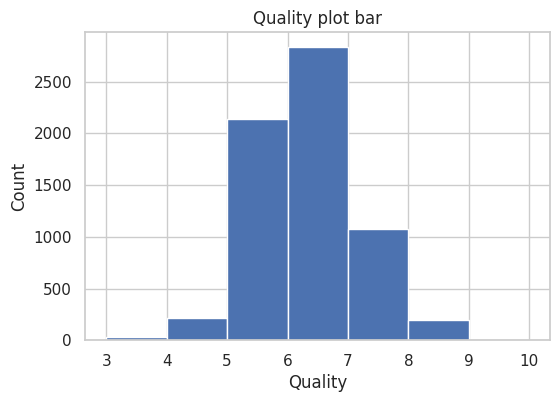

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('wine-full.csv')


quality_counts = df['quality'].value_counts().sort_index()
quality_counts
print(quality_counts)

plt.figure(figsize=(6,4))
plt.hist(df['quality'], bins=range(int(df['quality'].min()), int(df['quality'].max())+2))
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality plot bar")
plt.show()

Με βάση τους παραπανω αριθμους και το γραφημα, οχι το δειγμα δεν ειναι ισορροπημενο. Εχουμε πολλες τιμες για το σκορ 5 με 7, αλλα πολυ λιγες για τις ακριανες τιμες του δειγματος.

# Ερώτημα 2

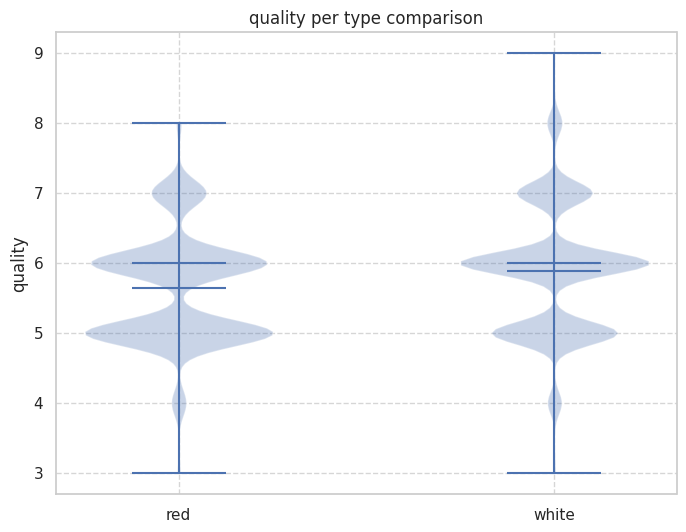

In [105]:
df['type'].unique()

red = df[df["type"]=="red"]["quality"]
white = df[df["type"]=="white"]["quality"]

plt.figure(figsize=(8,6))
plt.violinplot([red, white], showmeans=True, showmedians=True)
plt.xticks([1,2], ["red", "white"])
plt.ylabel("quality")
plt.title("quality per type comparison")
plt.grid(True, linestyle="--", alpha=0.8)
plt.show()

Τα λευκα κρασια, εχουν παραπανω δεδομενα για τις τιμες γυρω απο το 6, γυρω απο το 5, το 7 και λιγο στο 9 και το 4. Αντιστοιχα τα κοκκινα, δεν εχουν στο 9, και εχουν παραπανω στο 5, οσο περιπου και στο 6.

Φαινεται να υπαρχει καλυτερη ποιοτητα των λευκων κρασιων (απ αυτα τα δεδομενα, και λογω του γραφηματος). Επισης φαινεται απο τωρα πως θα εχουν καλυτερο ΜΟ και σιγουρα παραπανω τιμες που ειναι πιο κοντα στο 9.

# Ερώτημα 3

In [106]:
df["sweetness"] = np.where(df["residual sugar"] < 4, "dry", "sweet")

stats = df.groupby("sweetness")["quality"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
sweetness,,,,,,,,
dry,3539.0,5.818593,0.883799,3.0,5.0,6.0,6.0,9.0
sweet,2958.0,5.818120,0.860619,3.0,5.0,6.0,6.0,9.0


Οπως φαινεται απο την στατιστικη αναλυση, το mean ειναι κοινο μεχρι και τα πρωτα 3 δεκαδικα, οριακα ειναι ιδιο.

Επομενως, μονο κ μονο λογω της στατιστικης αναλυσης, οχι τα κρασια δεν εχουν διαφορα στην ποιοτητα τους.

Τελος, οχι, τα υπολειπομενα σακχαρα δε φαινεται να επηρεαζουν την ποιοτητα, αρα δεν υπαρχει καποια συσχετιση.

# Ερώτημα 4

In [107]:
from sklearn.model_selection import train_test_split

df = df.dropna()
df = df.drop(columns=["sweetness"]) # πολυ πολυ σημαντικο, επαιρνα ερρορ ποση ωρα, αν δε βγει το sweetness (string) δε θα μπορει να γινει εκπαιδευση του μοντελου

#print(df.isna().sum())
# (για μενα) για δικο μου debug ειναι, αν ειναι πολλα τα ΝαΝ τοτε θα αντικαταστασηω με το mean (fillna(mean)) αν εινα λιγα τοτε θα τα κανω drop
#print(df.isna().sum())

df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
# (για μενα) πολυ σημαντικο γιατι χωρις αυτο οι κατηγοριες θα ειναι string και δε μπορουμε να εκπαιδευσουμε μοντελα

x = df_encoded.drop("quality", axis=1).values
y = df_encoded["quality"].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=0
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape




((5816, 12), (647, 12), (5816,), (647,))

# Ερώτημα 5

In [108]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

mae

0.4528593508500773

# Ερώτημα 6

In [109]:
mae_list = []

for seed in range(10):
    x_train_seeded, x_test_seeded, y_train_seeded, y_test_seeded = train_test_split(
        x, y, test_size=0.10, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train_seeded, y_train_seeded)

    y_pred_seeded = model.predict(x_test_seeded)
    mae_seeded = mean_absolute_error(y_test_seeded, y_pred_seeded)

    mae_list.append(mae_seeded)

mae_mean = np.mean(mae_list)
mae_std = np.std(mae_list)

print("MAE mean:", mae_mean)
print("MAE std:", mae_std)

MAE mean: 0.4635239567233384
MAE std: 0.027600450425300523


Εφοσον ο ΜΟς του ΜΑΕ ειναι 0.46 και πριν ηταν 0.45, βλεπουμε οτι ειναι αρκετα κοντα, αρα το μοντελο μας ειναι σταθερο. Επισης, λογω του std, νομιζω ειναι αρκετα μικρο το 0.02 για να επηρεασει το πιο μερος του δειγματος αφαιρειται. Επομενως, ειτε ειναι seed 0 ειτε 5 ειτε 9, στο τελος η αποκλιση ειναι πολυ πολυ μικρη. Αρα δεν εχει σχεση με το τι σφαλμα παρουσιαζει το δειγμα.

# Ερώτημα 7

In [110]:
x_train_training, x_validation, y_train_training, y_validation = train_test_split(
    x_train, y_train, test_size=0.20, random_state=0
)

params_list = [
    {"max_depth": d, "min_samples_split": s}
    for d in [3,5,7,9,11]
    for s in [2,5,10]
][:15]

train_mae = []
valid_mae = []

for p in params_list:
    model = DecisionTreeRegressor(random_state=0, **p)
    model.fit(x_train_training, y_train_training)

    train_mae.append(mean_absolute_error(y_train_training, model.predict(x_train_training)))
    valid_mae.append(mean_absolute_error(y_validation, model.predict(x_validation)))

for i,p in enumerate(params_list):
    print(p, train_mae[i], valid_mae[i])

{'max_depth': 3, 'min_samples_split': 2} 0.5829177069455803 0.6124390102766345
{'max_depth': 3, 'min_samples_split': 5} 0.5829177069455803 0.6124390102766345
{'max_depth': 3, 'min_samples_split': 10} 0.5829177069455803 0.6124390102766345
{'max_depth': 5, 'min_samples_split': 2} 0.5375940977937167 0.580925444904905
{'max_depth': 5, 'min_samples_split': 5} 0.5378090591006814 0.580925444904905
{'max_depth': 5, 'min_samples_split': 10} 0.5378090591006814 0.580925444904905
{'max_depth': 7, 'min_samples_split': 2} 0.4867542634212313 0.5697922240754252
{'max_depth': 7, 'min_samples_split': 5} 0.4885456076459376 0.5711524760800071
{'max_depth': 7, 'min_samples_split': 10} 0.4941289913731304 0.568239105801946
{'max_depth': 9, 'min_samples_split': 2} 0.41706672954385426 0.578770169411704
{'max_depth': 9, 'min_samples_split': 5} 0.423585795116844 0.5754624830364684
{'max_depth': 9, 'min_samples_split': 10} 0.43940922773544955 0.5748374016258435
{'max_depth': 11, 'min_samples_split': 2} 0.30277330

# Ερώτημα 8

απο την παραπανω εκτελεση, το μοντελο με το χαμηλοτερο validation mae ειναι και το καλυτερο - γιατι το training ειναι biased, ενω το validation γενικευει καλυτερα το αποτελεμσα.

Αν το validation mae ειναι αρκετα υψηλο και το training mae ειναι χαμηλο, θα εχουμε overfit φαινομενο. Στο ιδανικο σεναριο θα θελαμε να ειναι περιπου το ιδιο, δλδ σχεδον μαζι.

Για υατο η απαντηση μου δεν ειναι αυτο με το χαμηλοτερο validation mean, αλλα αυτο που ειναι και σχετικα κοντα με το training mean για να μην εχουμε περιπτωση overfitting.

ετσι αν επρεπε να αποφασισω "τυπικα" θα ελεγα το καλυτερο ειναι αυτο γτ εχει το μικροτερο validation mae:

```
{'max_depth': 11, 'min_samples_split': 2} 0.3027733082423256 0.5596647438852982
```

ομως ως καλυτερο επιλεγω το παρακατω, βαζοντας και την κριτικη μου αποψη:
`{'max_depth': 7, 'min_samples_split': 2} 0.4867542634212313 0.5697922240754252`

# Ερώτημα 9

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,7,9,11],
    "min_samples_split": [2,5,10]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=0),
    param_grid,
    scoring="neg_mean_absolute_error",  # MAE
    cv=10,  # K=10 folds που ζητειται
    n_jobs=-1 # παραλληλισμος
)

grid.fit(x_train, y_train)

print("the best parameters comb:", grid.best_params_)



the best parameters comb: {'max_depth': 11, 'min_samples_split': 2}


και το Grid Search CV φαινεται να εβγαλε ακριβως το ιδιο αποτελεσμα (τυπικα ορθο) οπως ανεφερα στο παραπανω ερωτημα


# Ερώτημα 10

In [112]:
best_model = grid.best_estimator_
mae_testing = mean_absolute_error(y_test, best_model.predict(x_test))

print("final MAE:", mae_testing)

final MAE: 0.4970990328761242




1.   απο ερωτημα 6: τα random splits που καναμε με seed:0-9, βοηθησε για να δουμε ποσο αλλαζει το σφαλμα οταν κοβουμε δεδομενα (διαφορετικα καθε φορα), αλλα ειναι λιγο strict και εχει fixed σετ δεδομενων για τεστ. Δεν χρησ/ουνται σωστα τα δεδομενα του δειγματος για training/validation.
2.   απο ερωτημα 7: το train & validation σαν μεθοδολογια ειναι καλη, αλλα εξαρταται πολυ απο την τυχαιοτητα με την οποια κανουμε split μεταξυ training & validating sets. Αν πεσουμε σε "καλο" υποδειγμα τοτε θα βγει καλο αποτελεσμα, αλλιως οχι. Εχει αυξημενη πιθανοτητα να μην ειμαστε τυχεροι με την επιλογη μας και ετσι η μεθοδολογια να βγαλει ασχημα αποτελεσματα.
3.   απο ερωτημα 9: το grind search cv με k=10 ειναι αρκετα πιο καλη μεθοδολογια, γιατι χρησ/ουμε παραπανω δεδομενα για training και μειωνουμε κατα πολυ την τυχαιοτητα με την οποια αφαιρουμε δεδομενα για validation

**Συμπερασμα**: το καλυτερο ηταν το 9ο τασκ, στο οποιο χρησ/με GridSearchCV. Στο 6 ειδαμε τη μεταβλητοτητα των δεδομενων μας, και στο 7 ειδαμε πως μπορει με ενα τυχαιο split να εχουμε καλο αποτελεσμα, αλλα παλι ειμαστε αρκετα δεμενοι με αυτη την εκδοχη της τυχαιοτητας.

# Ερώτημα 11

best model with max depth 5: {'max_depth': 5, 'min_samples_split': 2}


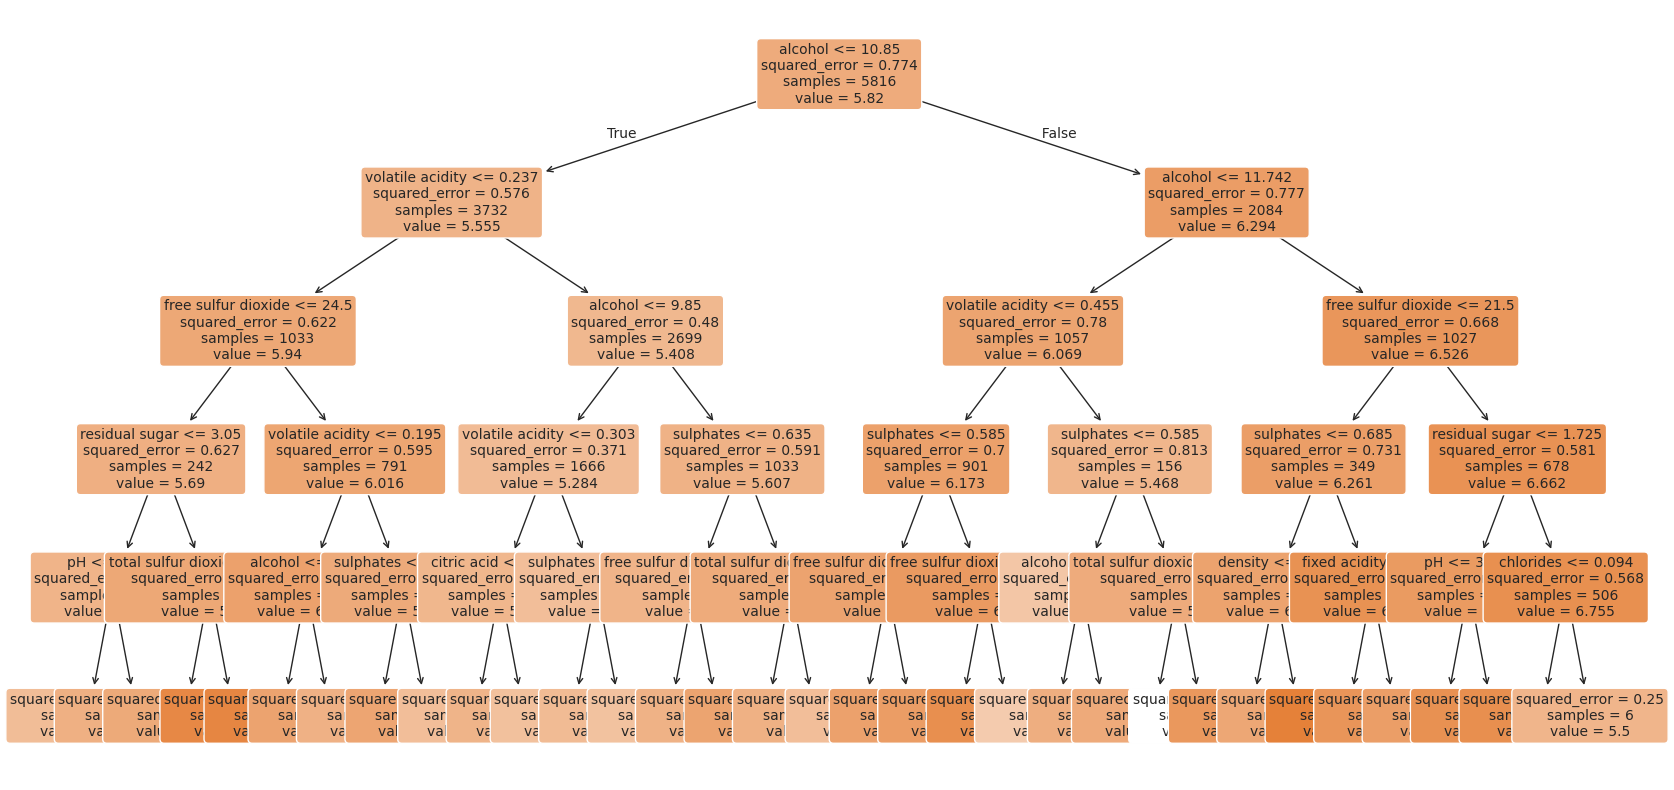

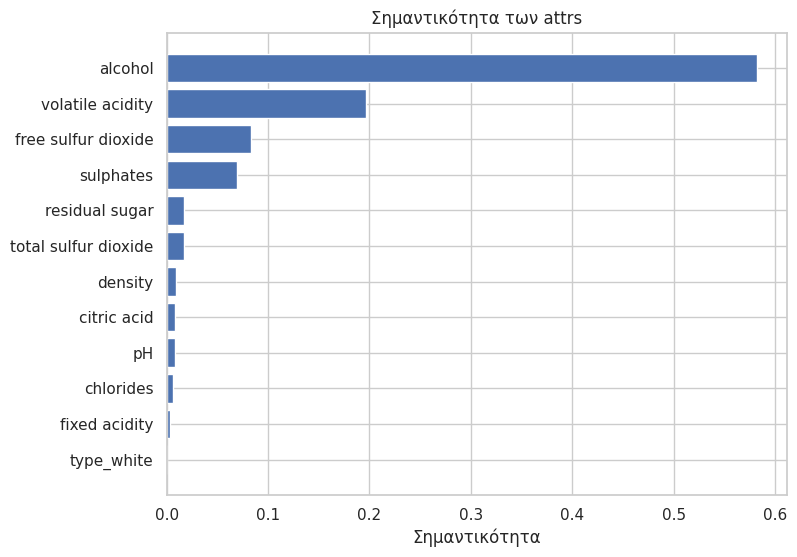

In [113]:
from sklearn.tree import plot_tree

param_grid = {
    "max_depth": [5],
    "min_samples_split": [2,5,10]
}

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_

print("best model with max depth 5:", grid.best_params_)

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=df_encoded.drop("quality", axis=1).columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

importances = best_model.feature_importances_
features = df_encoded.drop("quality", axis=1).columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Σημαντικότητα των attrs")
plt.xlabel("Σημαντικότητα")
plt.show()

αρα με χρησ/ντας το plot, βλεπουμε πως τα πολυ γλυκα κρασια, αυτα με υψηλη volatile acidity και υψηλα θειωδη εχουν χαμηλοτερες αξιολογησεις

τελος, καλυτερη ποιοτητα εχουν αυτα με το **υψηλοτερο** αλκοολ και τη **χαμηλη** πτητικη οξυτητα